In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [42]:
from lightfm.datasets import fetch_movielens
from lightfm import LightFM
from lightfm.evaluation import auc_score

In [43]:
#fetch data and format it
data = fetch_movielens()
train , test = data['train'], data['test']

In [44]:
#print testing and training data in string representation
print(repr(data['train']))
print(repr(data['test']))

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 90570 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 9430 stored elements in COOrdinate format>


In [45]:
#create models
alpha = 1e-05
epochs = 60
num_components = 32

In [46]:
warp_model = LightFM(no_components=num_components,  
    loss='warp',
    item_alpha=alpha,
    user_alpha=alpha,
    max_sampled=200,
    )

In [47]:
bpr_model = LightFM(no_components=num_components,  
    loss='bpr',
    item_alpha=alpha,
    user_alpha=alpha,
    max_sampled=200,
    )

In [48]:
logistic_model = LightFM(no_components=num_components,  
    loss='logistic',
    item_alpha=alpha,
    user_alpha=alpha,
    max_sampled=200,
    )

In [49]:
warp_kos_model = LightFM(no_components=num_components,  
    loss='warp-kos',
    item_alpha=alpha,
    user_alpha=alpha,
    max_sampled=200,
    )

In [38]:
warp_auc = []
bpr_auc = []
warp_kos_auc = []
logistic_auc = []

In [39]:
for epoch in range(epochs):
    warp_model.fit_partial(train, epochs=1)
    warp_auc.append(auc_score(warp_model,test,train_interactions=train).mean())

In [40]:
for epoch in range(epochs):
    bpr_model.fit_partial(train, epochs=1)
    bpr_auc.append(auc_score(bpr_model,test,train_interactions=train).mean())

In [50]:
for epoch in range(epochs):
    logistic_model.fit_partial(train, epochs=1)
    logistic_auc.append(auc_score(logistic_model,test,train_interactions=train).mean())

In [51]:
for epoch in range(epochs):
    warp_kos_model.fit_partial(train, epochs=1)
    warp_kos_auc.append(auc_score(warp_kos_model,test,train_interactions=train).mean())

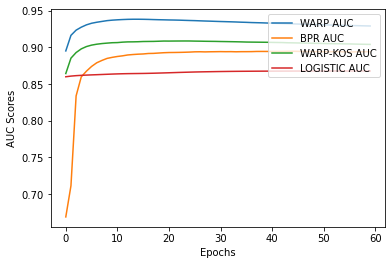

In [63]:
x= np.arange(epochs)
plt.plot(x,np.array(warp_auc))
plt.plot(x,np.array(bpr_auc))
plt.plot(x,np.array(warp_kos_auc))
plt.plot(x,np.array(logistic_auc))
plt.ylabel('AUC Scores')
plt.xlabel('Epochs')
plt.legend(['WARP AUC','BPR AUC','WARP-KOS AUC','LOGISTIC AUC'], loc='upper right')
plt.show()

In [77]:
print('Hybrid training set AUC using warp loss: %s' % np.array(warp_auc).mean())
print('Hybrid training set AUC using bpr loss: %s' % np.array(bpr_auc).mean())
print('Hybrid training set AUC using logistic loss: %s' % np.array(logistic_auc).mean())
print('Hybrid training set AUC using warp_kos loss: %s' % np.array(warp_kos_auc).mean())

Hybrid training set AUC using warp loss: 0.9327615
Hybrid training set AUC using bpr loss: 0.88347363
Hybrid training set AUC using logistic loss: 0.8658272
Hybrid training set AUC using warp_kos loss: 0.9050389
